In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [51]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Amount has the minimum value of 0.00 varies up to 25691.16
Most of the columns have there minimum value less than 0

### Checking for Null values

In [53]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no null values in the dataset

In [54]:
df.duplicated().sum()


1081

#### We have 1081 duplicate values

In [56]:
#dropping the duplicates
df = df.drop_duplicates(keep = 'first') 

### EDA

### Univeriate Analysis


In [58]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

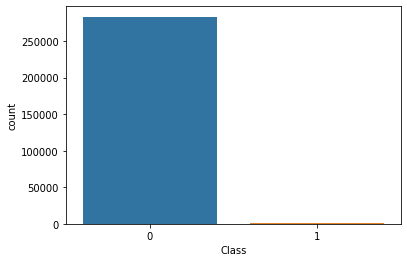

In [59]:
sns.countplot(data=df,x='Class')

#### Target Column is highly Imbalance

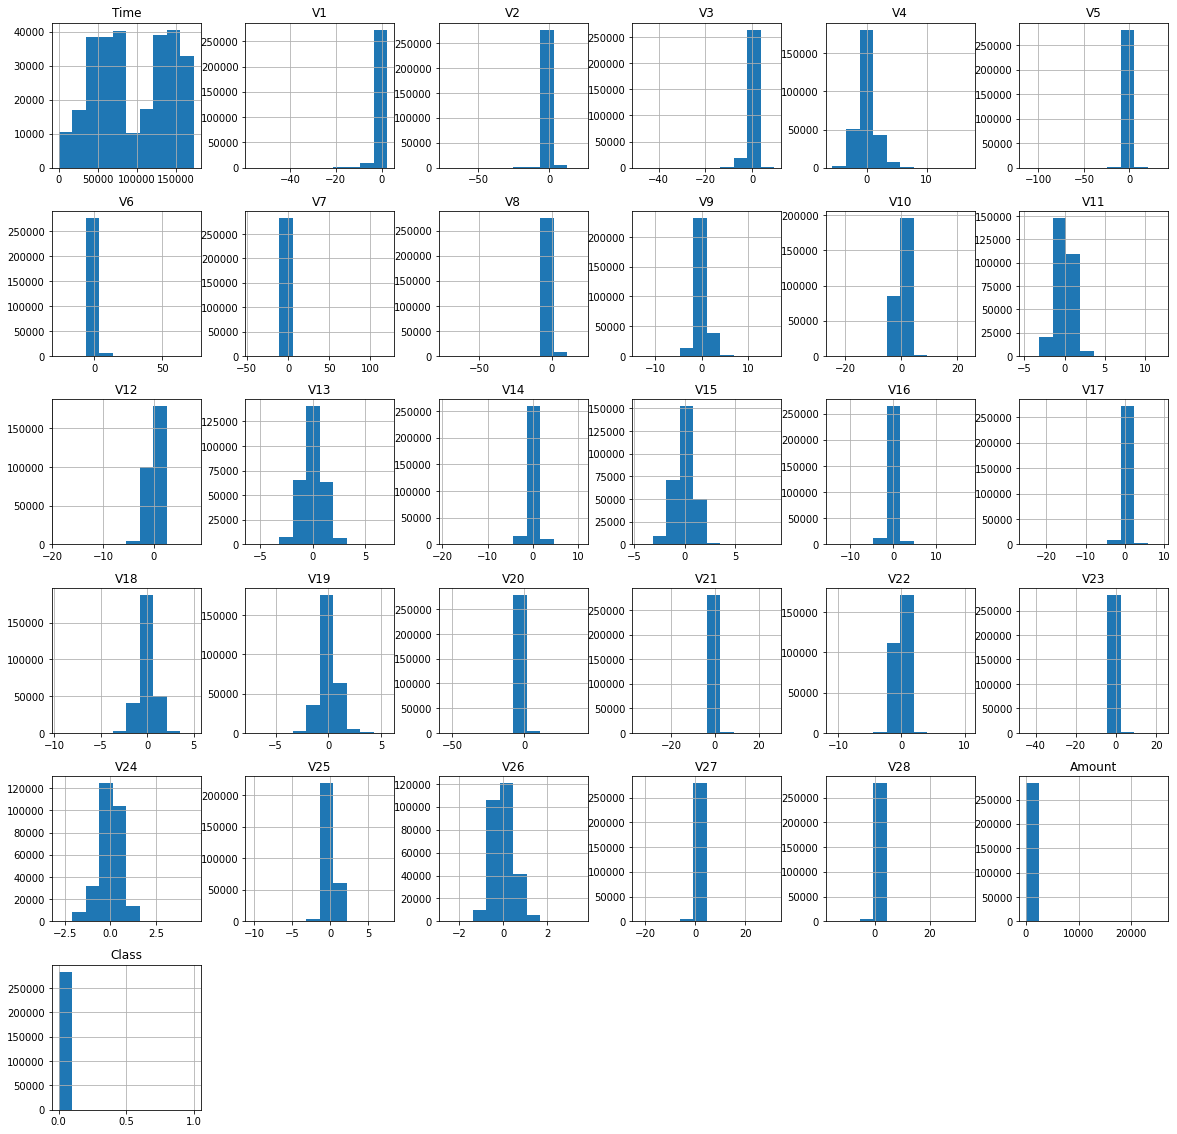

In [61]:
df.hist(figsize=(20,20))
plt.show()

### Checking for Outliers


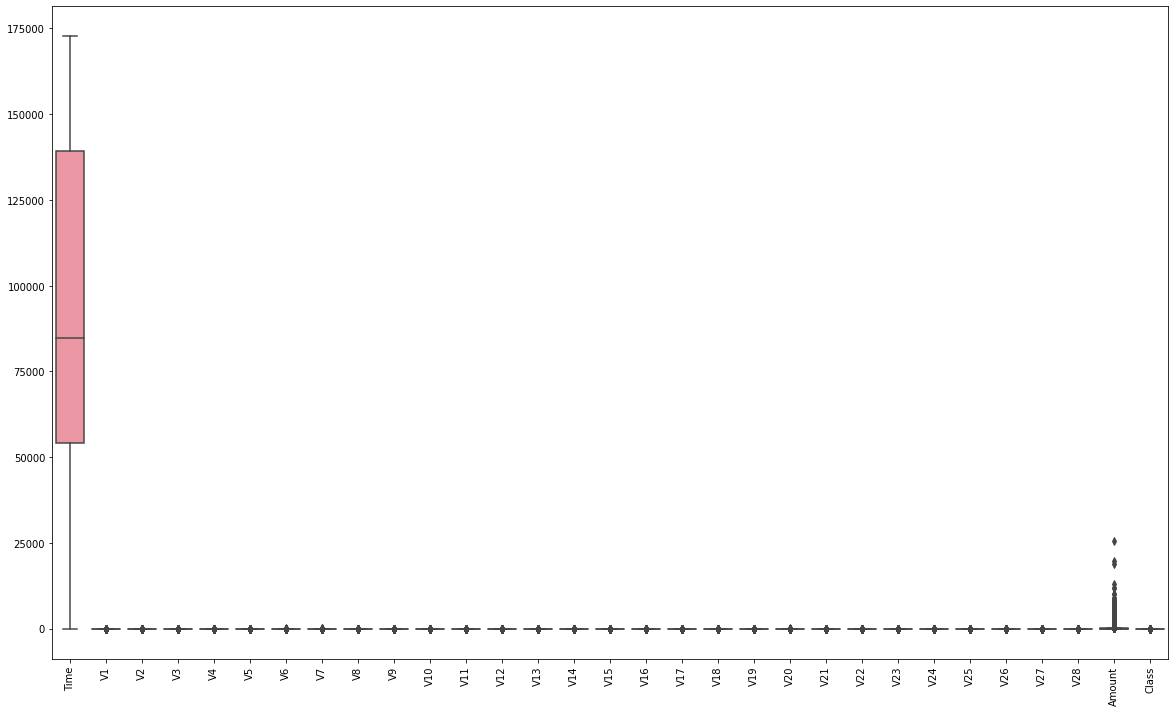

In [62]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

#### Column Amount has some outliers present

In [63]:
df[(df["Amount"]>25000)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,...,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0


In [64]:
df.drop([274771], inplace=True)

### Checking for skewness

Time
-0.035576901832475215
V1
-3.257747681263229
V2
-4.679088319055812
V3
-2.0475569159753224
V4
0.6675576925420371
V5
-0.4443344156171457
V6
1.2631005160357658
V7
-0.4728630286347081
V8
-8.29074926594825
V9
0.5378128867364523
V10
1.2585560666452231
V11
0.34315172717091535
V12
-2.197303140149732
V13
0.06309254800240761
V14
-1.9181007575499565
V15
-0.3129292500265546
V16
-1.080616558696569
V17
-3.689799484192467
V18
-0.24864598484967332
V19
0.10731761060474336
V20
-0.8156759661852643
V21
2.927377848478668
V22
-0.1840327352482715
V23
-5.867348191571313
V24
-0.5537417371496076
V25
-0.41816960605459247
V26
0.5792632146899824
V27
-2.6376259223189304
V28
12.062261493415434
Amount
13.977572539679915
Class
24.430372643970415


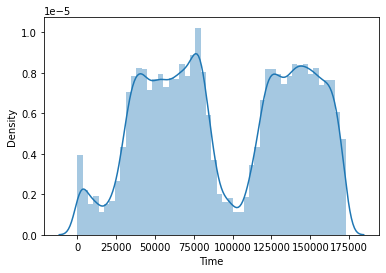

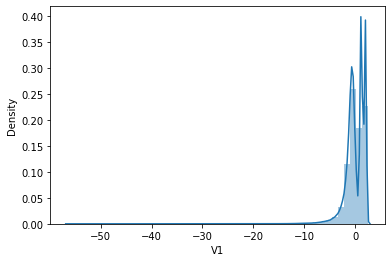

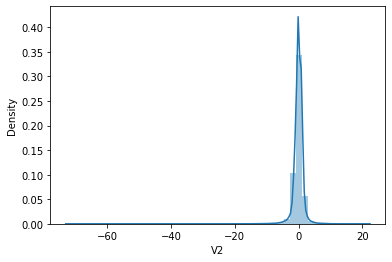

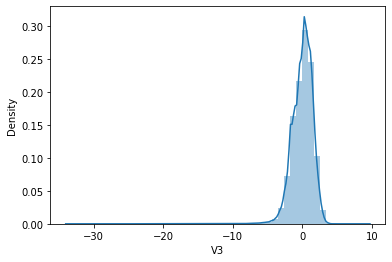

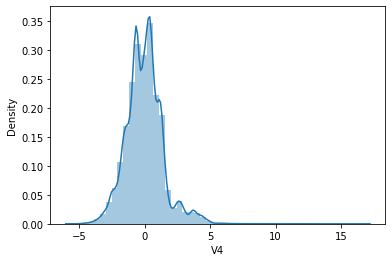

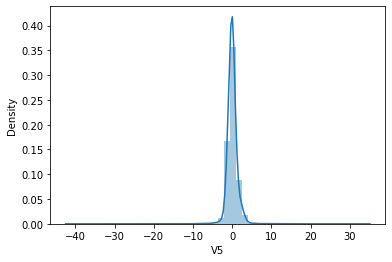

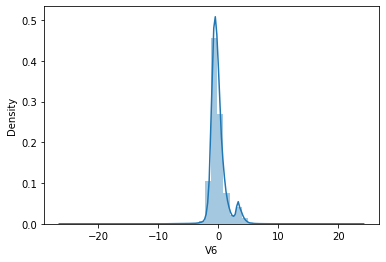

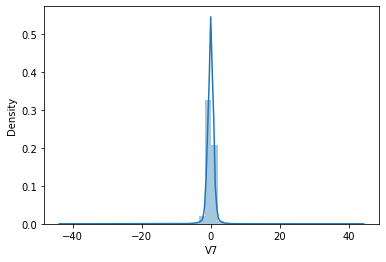

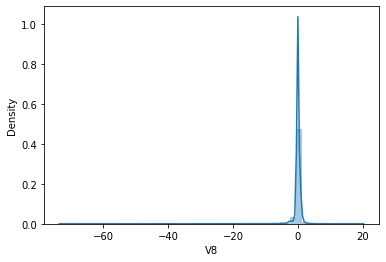

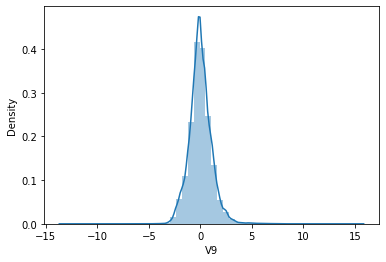

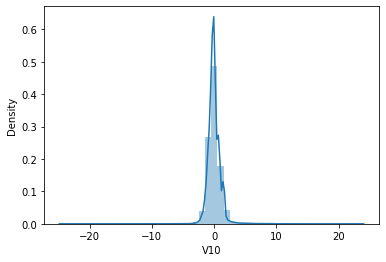

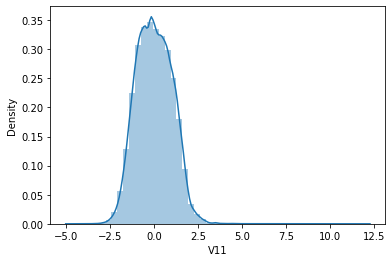

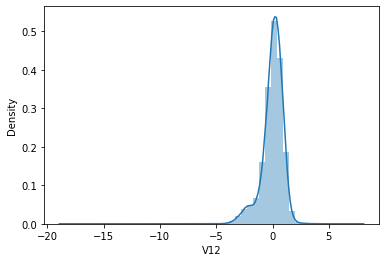

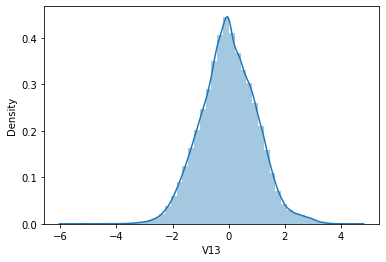

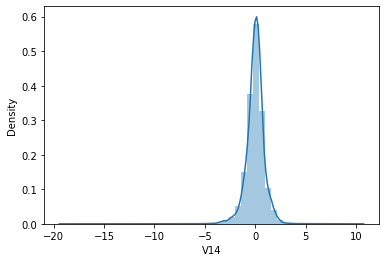

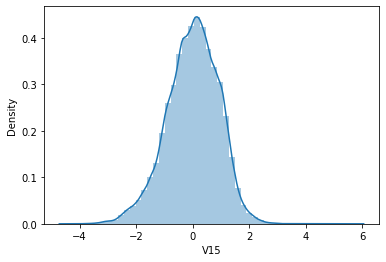

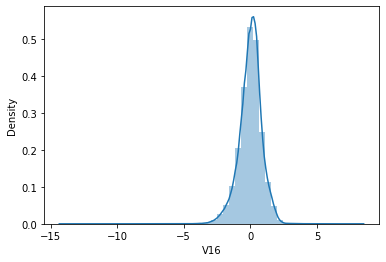

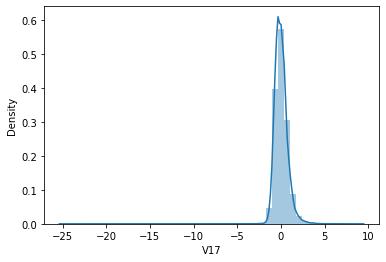

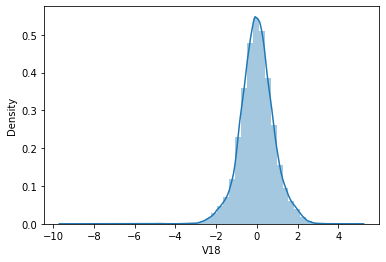

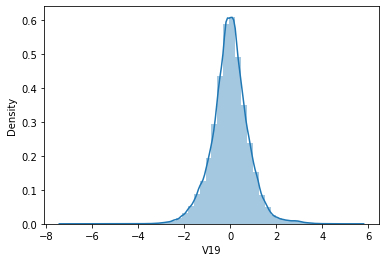

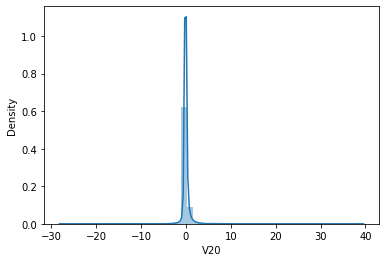

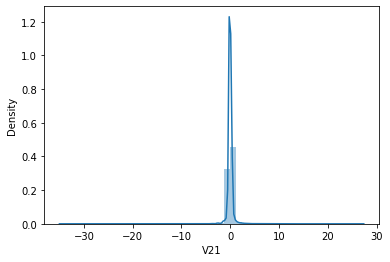

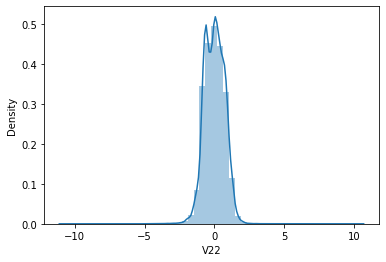

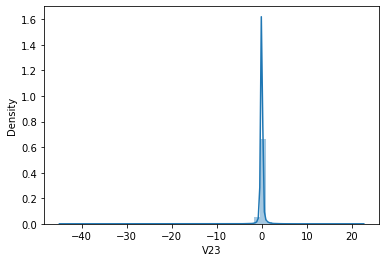

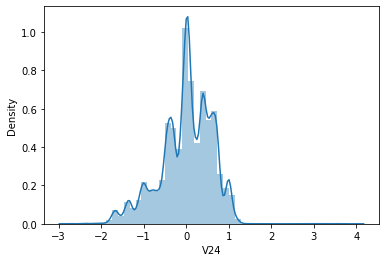

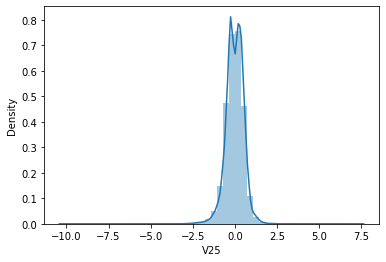

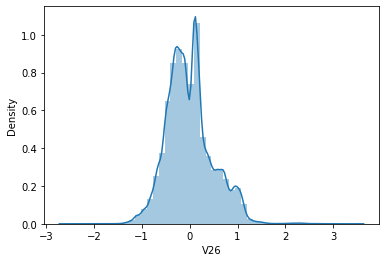

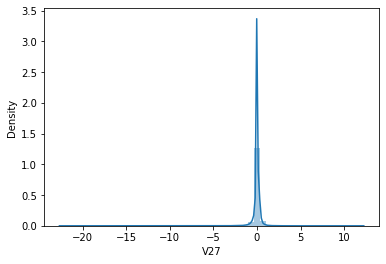

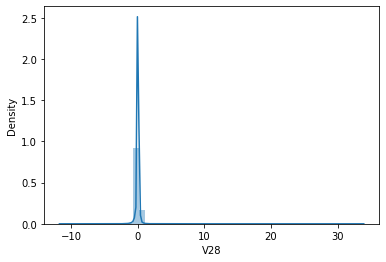

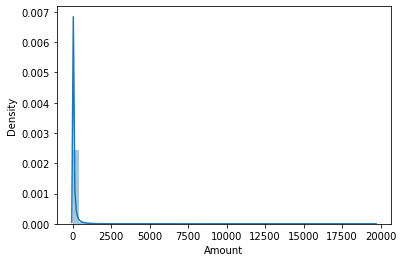

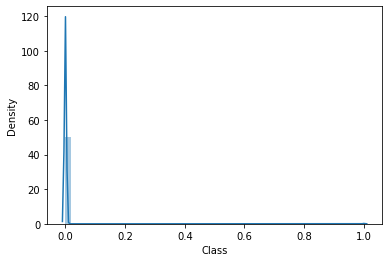

In [65]:
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])

In [66]:
#handling Skewness
df["Amount"]=np.sqrt(df["Amount"]) 

In [67]:
df["V28"]=np.sqrt(df["V28"]) 

### Biveriate Analysis


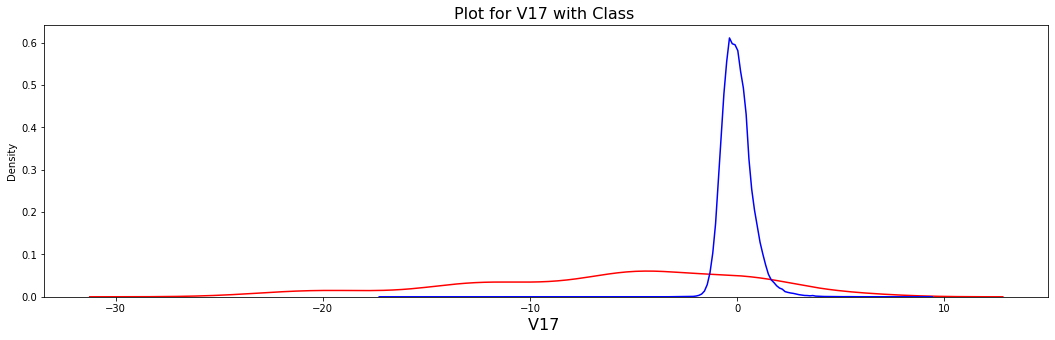

In [68]:
plt.figure(figsize=(18,5))

sns.distplot(df['V17'][df['Class']==1],hist=False,color='red')

sns.distplot(df['V17'][df['Class']==0],hist=False,color='blue')

plt.xlabel('V17 ', fontsize = 16)
plt.title('Plot for V17 with Class ', fontsize = 16)
plt.show()

#### In Class 0, V17 column is best at 0.
In class 1, V17 ranges from -20 to 5

In [ ]:
plt.figure(figsize=(18,5))

sns.distplot(df['Amount'][df['Class']==1],hist=False,color='red')

sns.distplot(df['Amount'][df['Class']==0],hist=False,color='blue')

plt.xlabel('Amount ', fontsize = 16)
plt.title('Plot for Amount with Class ', fontsize = 16)
plt.show()

#### From above graph we see that, Amount is class 0 with the range from 0 to 20.
Amount is class 1 with the range from less than 0 to 25.

### Multiveriate Analysis

In [70]:
df.corr()['Class'].sort_values()

V17      -0.313540
V14      -0.293403
V12      -0.250750
V10      -0.207018
V16      -0.187313
V3       -0.182657
V7       -0.175339
V18      -0.105341
V1       -0.094544
V9       -0.094024
V5       -0.088900
V6       -0.044144
Time     -0.012359
V24      -0.007210
V23      -0.006334
V13      -0.003896
V15      -0.003299
V25       0.003204
Amount    0.003393
V26       0.004266
V22       0.004889
V20       0.021668
V27       0.022154
V21       0.026395
V8        0.033096
V19       0.033635
V28       0.061143
V2        0.084677
V4        0.129354
V11       0.149080
Class     1.000000
Name: Class, dtype: float64

<AxesSubplot:>

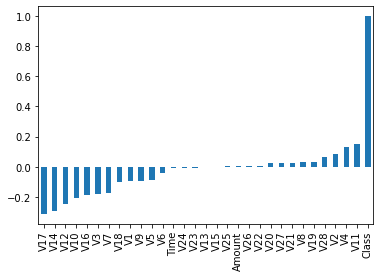

In [71]:
df.corr()['Class'].sort_values().plot(kind='bar')

#### * Compared to other columns, V17 is highly negatively correlated with the class.  
* V11 has the positive correlation with the targe

<AxesSubplot:>

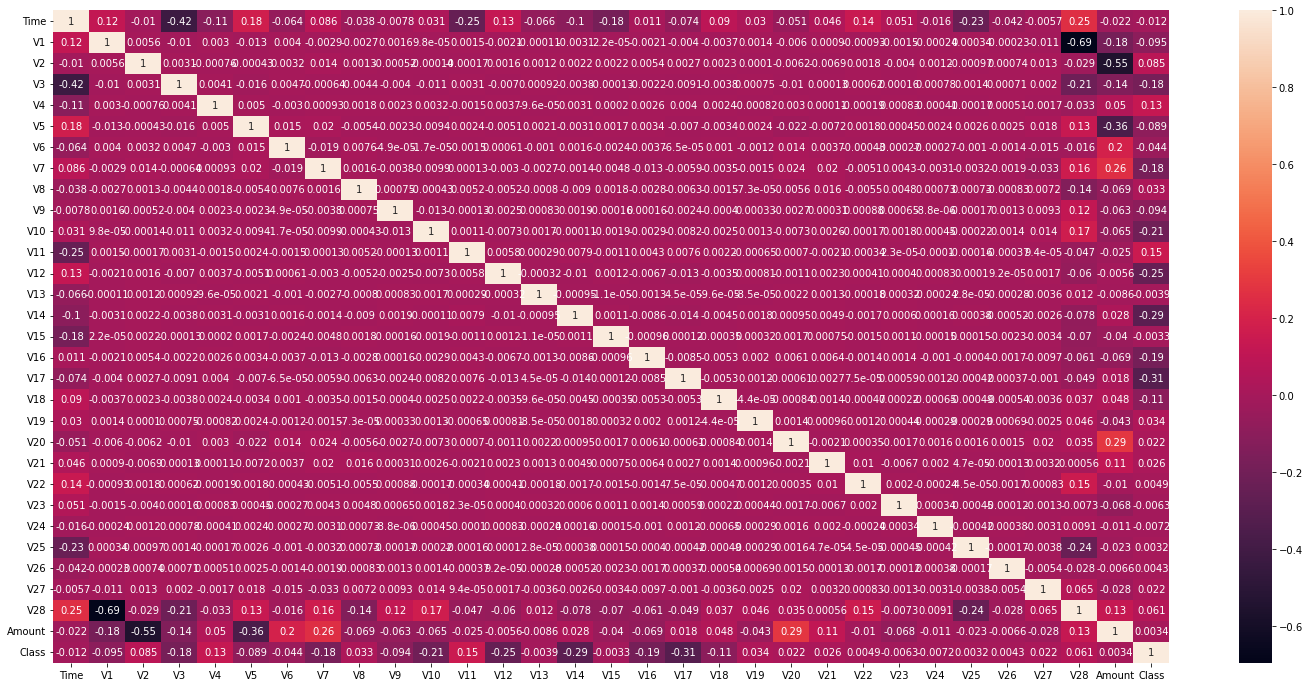

In [72]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(), annot=True)

#### Compared to other columns, V17 is highly negatively correlated with the class.
V11 has the positive correlation with the target column

In [73]:
df.corr().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.118093,-0.010460,-0.422651,-0.105925,0.175788,-0.063913,0.086295,-0.038117,-0.007843,0.031134,-0.248592,0.125569,-0.066002,-0.100288,-0.184475,0.011189,-0.073784,0.090319,0.029503,-0.051100,0.046144,0.143702,0.051488,-0.015996,-0.233340,-0.041860,-0.005659,0.253787,-0.021556,-0.012359
V1,0.118093,1.000000,0.005638,-0.010197,0.002956,-0.012508,0.003977,-0.002906,-0.002664,0.001602,0.000098,0.001462,-0.002120,-0.000107,-0.003124,0.000022,-0.002073,-0.004042,-0.003689,0.001355,-0.006003,0.000898,-0.000930,-0.001494,-0.000236,0.000340,-0.000228,-0.010695,-0.694865,-0.179935,-0.094544
V2,-0.010460,0.005638,1.000000,0.003102,-0.000758,-0.000426,0.003176,0.014376,0.001320,-0.000515,-0.000140,-0.000175,0.001638,0.001168,0.002226,0.002201,0.005371,0.002666,0.002318,0.000103,-0.006171,-0.006948,0.001776,-0.004030,0.001217,-0.000974,0.000737,0.013157,-0.029262,-0.549373,0.084677
V3,-0.422651,-0.010197,0.003102,1.000000,0.004059,-0.016433,0.004736,-0.000644,-0.004446,-0.003985,-0.010913,0.003104,-0.006957,0.000923,-0.003840,-0.000135,-0.002199,-0.009138,-0.003767,0.000749,-0.010370,0.000128,0.000617,0.000163,0.000784,0.001414,0.000707,0.001994,-0.211980,-0.139416,-0.182657
V4,-0.105925,0.002956,-0.000758,0.004059,1.000000,0.004956,-0.002997,0.000926,0.001777,0.002290,0.003180,-0.001480,0.003719,-0.000096,0.003074,0.000202,0.002593,0.003982,0.002415,-0.000819,0.003046,0.000106,-0.000185,0.000829,-0.000409,-0.000172,0.000507,-0.001745,-0.032950,0.050333,0.129354
V5,0.175788,-0.012508,-0.000426,-0.016433,0.004956,1.000000,0.015352,0.020483,-0.005392,-0.002269,-0.009412,0.002399,-0.005094,0.002129,-0.003116,0.001675,0.003440,-0.007031,-0.003411,0.002435,-0.022255,-0.007170,0.001758,0.000451,0.002431,0.002646,0.002483,0.017873,0.132912,-0.359320,-0.088900
V6,-0.063913,0.003977,0.003176,0.004736,-0.002997,0.015352,1.000000,-0.019044,0.007582,-0.000049,-0.000017,-0.001524,0.000610,-0.000997,0.001577,-0.002365,-0.003744,-0.000065,0.001002,-0.001213,0.013743,0.003685,-0.000428,-0.000265,-0.000268,-0.001004,-0.001410,-0.015461,-0.016315,0.195925,-0.044144
V7,0.086295,-0.002906,0.014376,-0.000644,0.000926,0.020483,-0.019044,1.000000,0.001640,-0.003763,-0.009929,0.000127,-0.003007,-0.002695,-0.001368,-0.004836,-0.013037,-0.005949,-0.003525,-0.001522,0.023930,0.019718,-0.005098,0.004254,-0.003058,-0.003152,-0.001861,-0.033126,0.163899,0.256627,-0.175339
V8,-0.038117,-0.002664,0.001320,-0.004446,0.001777,-0.005392,0.007582,0.001640,1.000000,0.000750,-0.000431,0.005243,-0.005175,-0.000797,-0.008980,0.001839,-0.002760,-0.006279,-0.001517,-0.000073,-0.005569,0.016492,-0.005518,0.004791,0.000732,0.000726,-0.000828,0.007231,-0.136532,-0.068582,0.033096
V9,-0.007843,0.001602,-0.000515,-0.003985,0.002290,-0.002269,-0.000049,-0.003763,0.000750,1.000000,-0.012755,-0.000133,-0.002500,0.000834,0.001893,-0.000162,0.000161,-0.002424,-0.000402,0.000332,-0.002744,0.000307,0.000883,0.000645,-0.000009,-0.000166,0.001342,0.009321,0.115305,-0.063266,-0.094024


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
X=df.drop("Class",axis=1)
Y=df["Class"] 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
X_train.shape

(199364, 30)

In [11]:
model=tf.keras.Sequential([
              tf.keras.layers.Dense(200,activation='relu',input_shape=(X.shape[1],)),  #hidden layer1
              tf.keras.layers.Dense(180,activation='relu'),
              tf.keras.layers.Dense(160,activation='relu'),
              tf.keras.layers.Dense(140,activation='relu'),
              tf.keras.layers.Dense(120,activation='relu'),
              tf.keras.layers.Dense(100,activation='relu'), 
              tf.keras.layers.Dense(80,activation='relu'),
              tf.keras.layers.Dense(60,activation='relu'),
              tf.keras.layers.Dense(40,activation='relu'),
              tf.keras.layers.Dense(1,activation='sigmoid')
])              

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
trained_model=model.fit(X_train, Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
6231/6231 [==============================] - 33s 5ms/step - loss: 0.0078 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/10
6231/6231 [==============================] - 32s 5ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 3/10
6231/6231 [==============================] - 32s 5ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/10
6231/6231 [==============================] - 30s 5ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 5/10
6231/6231 [==============================] - 28s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0077 - val_accuracy: 0.9990
Epoch 6/10
6231/6231 [==============================] - 28s 5ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 7/10
6231/6231 [==============================] - 31s 5ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0056 - val_ac

In [14]:
print("Testing Error and Accuracy of Testing Data : ",model.evaluate(X_test, Y_test) )

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0474 - accuracy: 0.9991
Testing Error and Accuracy of Testing Data :  [0.047446418553590775, 0.9990637302398682]


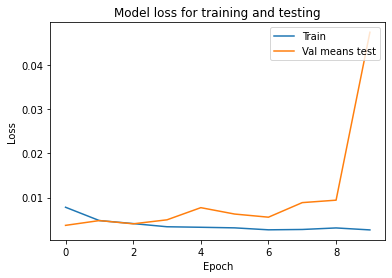

In [15]:
plt.plot(trained_model.history['loss']) #training's loss means error
plt.plot(trained_model.history['val_loss']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

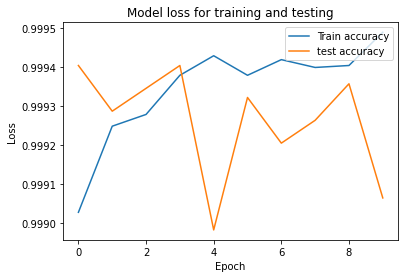

In [16]:
plt.plot(trained_model.history['accuracy']) #training's loss means error
plt.plot(trained_model.history['val_accuracy']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'test accuracy'], loc='upper right')#loc means location
plt.show()

In [17]:
Y_pred=model.predict(X_test).round(2) 
Y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [18]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(Y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.79      0.73       135

    accuracy                           1.00     85443
   macro avg       0.84      0.90      0.86     85443
weighted avg       1.00      1.00      1.00     85443


 Confusion Matrix
[[85256    52]
 [   28   107]]
